<a href="https://colab.research.google.com/github/Vanshsaxena097/Bank-Mangement-System/blob/main/E22CSEU1194__B41__VanshSaxena_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

**Loading dataset**

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


In [5]:
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

In [6]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
from tensorflow.keras import models, layers

# Construct the neural network
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(784,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
# Train the model
history = model.fit(train_images, train_labels,
                    validation_split=0.1,
                    epochs=10,
                    batch_size=32)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8717 - loss: 0.4391 - val_accuracy: 0.9652 - val_loss: 0.1180
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9652 - loss: 0.1172 - val_accuracy: 0.9737 - val_loss: 0.0908
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9767 - loss: 0.0745 - val_accuracy: 0.9710 - val_loss: 0.0992
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9827 - loss: 0.0551 - val_accuracy: 0.9765 - val_loss: 0.0821
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9872 - loss: 0.0387 - val_accuracy: 0.9748 - val_loss: 0.0860
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9897 - loss: 0.0309 - val_accuracy: 0.9757 - val_loss: 0.0818
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9920 - loss: 0.0255 - val_accuracy: 0.9792 - val_loss: 0.0846
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9934 - loss: 0.0203

In [11]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9727 - loss: 0.1205
Test Accuracy: 0.9771
Test Loss: 0.0945


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


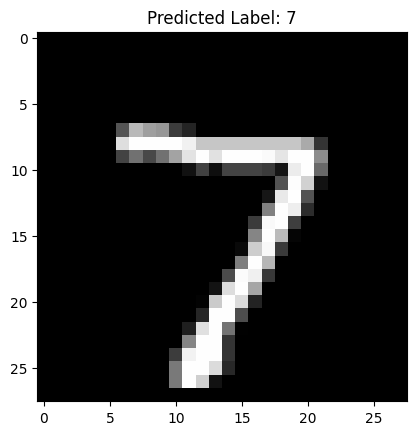

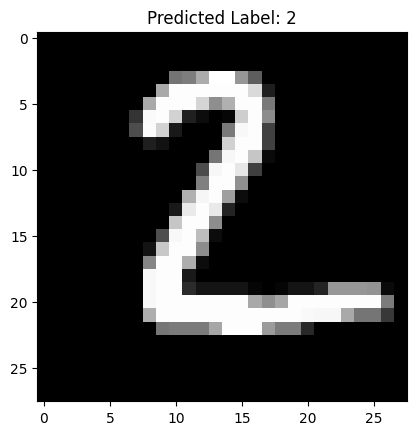

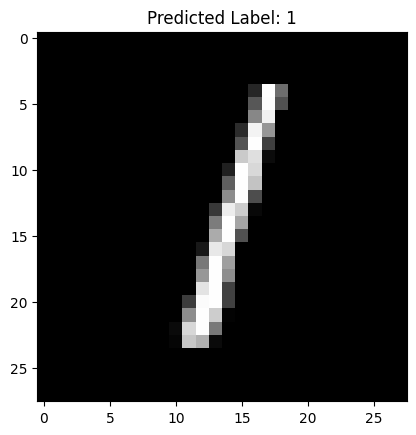

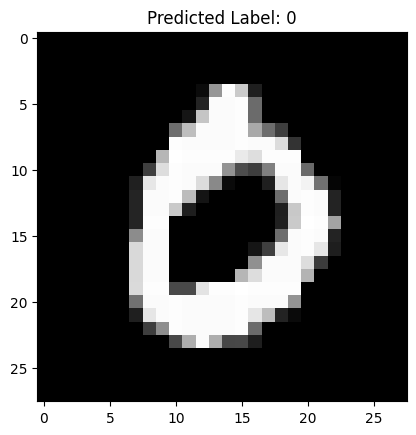

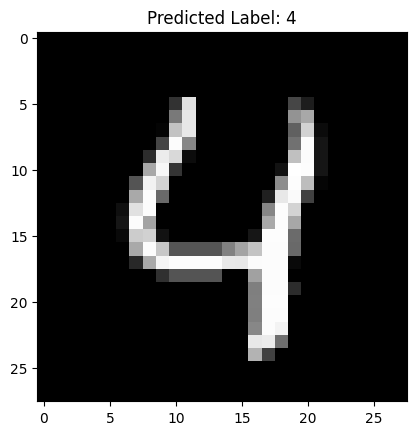

In [12]:
# Make predictions on a few test images
predictions = model.predict(test_images[:5])


for i in range(5):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Label: {predictions[i].argmax()}")
    plt.show()
